# Assignment 12
# Collin Dabbieri

# Write a program that will calculate ratio of nebular to auroral line emission of NeV as a function of temperature

In [26]:
# First looking at OIII so we can check our results


#nu21 can be a vector with fine structure values

# j32 ~ nu32 q13 N1 (A32)/(A32+A31)

# Br32 = (A32)/(A32+A31)
# j21 ~ nu21 N1 (q12 + q23 Br32)

# j21/j32 = R = (nu21(q12+q23 Br32))/(nu32 q13 Br32)

# R = [q12/q13 + Br32] (nu21)/(Br32 nu32)

# q12/q13=(oopsilon(1,2))/(oopsilon(1,3)) exp(E32/kT)



# R = [exp(E32/kT)+Br32 Oops(1,3)/Oops(1,2)] (nu21 Oops(1,2))/(Br32 nu32 Oops(1,3))


#Need Oops_ratio, nu21, nu32, A32, A31, E32, T

#Oops_ratio is (1,2)/(1,3)

#nu_neb, A_neb, A_aur can be a vector

#A_aur is something like (A54,A53,A52,A51)

import math
import numpy as np
from matplotlib import pyplot as plt

def RatioNebularAuroral(T,A_aur,A_neb,nu_aur,nu_neb, E_aur, Oops_ratio):
    
    Br=(A_aur[0])/(sum(A_aur))
    k=8.617e-5 #ev/K
    
    nu_neb_eff=sum([nu_neb[i]*A_neb[i]/sum(A_neb) for i in range(len(A_neb))])
       
    try:
        R=(math.exp(E_aur/(k*T))+(Br/Oops_ratio))*(Oops_ratio*nu_neb_eff)/(Br*nu_aur[0])
    except:
        R=0
        
    return R

#from angstroms, to freq
def lamtofreq(lam):
    c=2.998e18
    return(c/lam)

#from angstroms, to eV
def lamtoE(lam):
    h=4.135e-15 #eV s
    c=2.998e18 #Angstrom / s
    return(h*c/lam)
    
    

In [27]:
#first for OIII

T=np.linspace(5000,2.0e4,num=100)

A_aur=[1.6,6.1e-4,2.3e-1]
nu_aur=[lamtofreq(4363.2),lamtofreq(2331.4),lamtofreq(2321.0)]
A_neb=[2.0e-2,6.8e-3,1.7e-6]
nu_neb=[lamtofreq(5006.9),lamtofreq(4958.9),lamtofreq(4931.1)]
Oops_ratio=2.29/0.29

E_aur=lamtoE(4363.2)

ROIII=[RatioNebularAuroral(i,A_aur,A_neb,nu_aur,nu_neb,E_aur,Oops_ratio) for i in T]

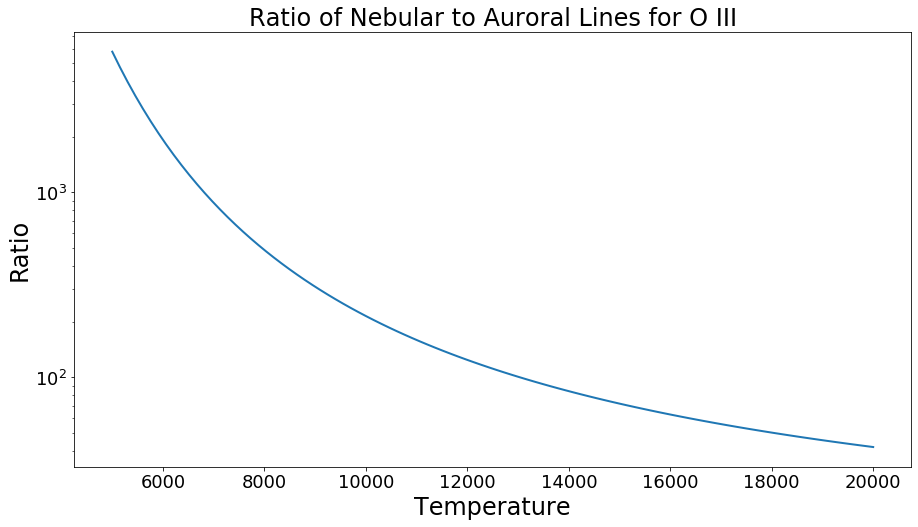

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(T,ROIII,lw=2)
plt.yscale('log')
plt.ylabel("Ratio",fontsize=24)
plt.xlabel("Temperature",fontsize=24)
plt.title("Ratio of Nebular to Auroral Lines for O III", fontsize=24)
plt.tick_params(labelsize=18)

In [40]:
#Next for Ne V

T=np.linspace(5000,2.0e4,num=100)

A_aur=[2.6,6.8e-3,4.2]
nu_aur=[lamtofreq(2973.13),lamtofreq(1592.2),lamtofreq(1574.7)]
A_neb=[3.82e-1,1.38e-1,1.9e-5]
nu_neb=[lamtofreq(3425.9),lamtofreq(3345.8),lamtofreq(3300.4)]
Oops_ratio=2.09/0.25

E_aur=lamtoE(2973.13)

RNeV=[RatioNebularAuroral(i,A_aur,A_neb,nu_aur,nu_neb,E_aur,Oops_ratio) for i in T]

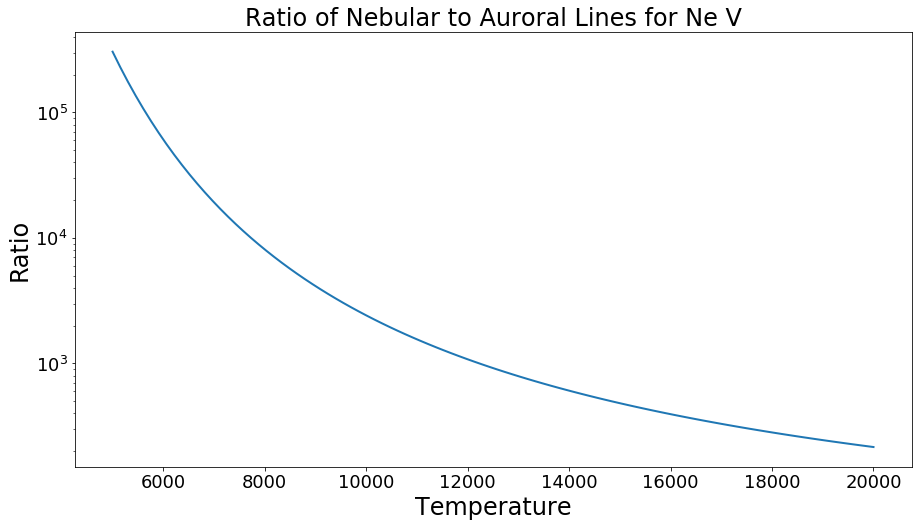

In [41]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(T,RNeV,lw=2)
plt.yscale('log')
plt.ylabel("Ratio",fontsize=24)
plt.xlabel("Temperature",fontsize=24)
plt.title("Ratio of Nebular to Auroral Lines for Ne V", fontsize=24)
plt.tick_params(labelsize=18)

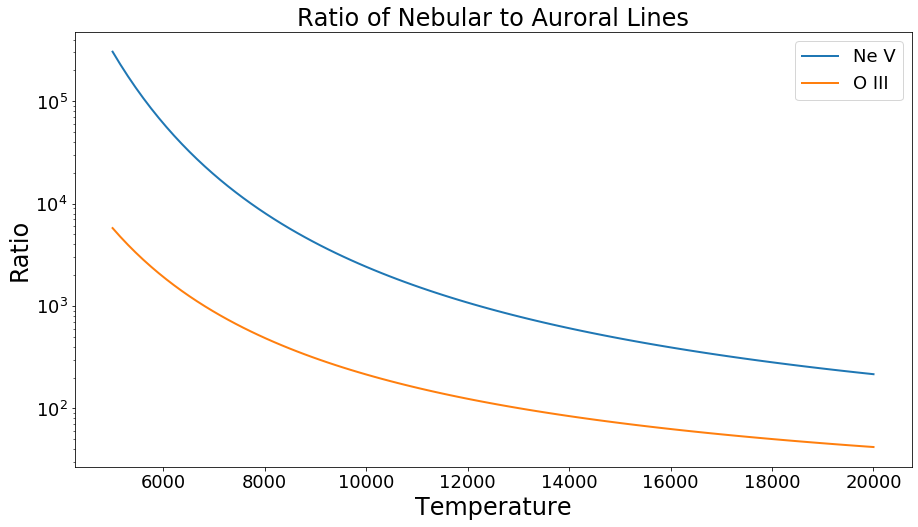

In [42]:
plt.plot(T,RNeV,lw=2,label="Ne V")
plt.plot(T,ROIII,lw=2,label="O III")
plt.legend(fontsize=18)
plt.yscale('log')
plt.ylabel("Ratio",fontsize=24)
plt.xlabel("Temperature",fontsize=24)
plt.title("Ratio of Nebular to Auroral Lines", fontsize=24)
plt.tick_params(labelsize=18)

# Ne V has more nebular lines at a given temperature than O III, this makes sense because Ne V is missing more outer electrons, so it would take more energy to get to the 5th level through collision